# Принятие решений в бизнесе

Приоритизируем гипотезы крупного интернет-магазина, анализируем результаты A/B-теста.

В ходе работы изучим выручку, средний чек и число заказов на посетителя по группам, найдем аномалии, сравним группы по основным показателям и другое.

## Часть 1. Приоритизация гипотез.

Откроем файл с гипотезами и проверим типы данных.

In [1]:
import pandas as pd

In [2]:
pd.options.display.max_colwidth = 150

In [3]:
hypothesis = pd.read_csv('/datasets/hypothesis.csv')
hypothesis

,Hypothesis,Reach,Impact,Confidence,Efforts
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",3,10,8,6
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2,5,4,10
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",8,3,7,3
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",8,3,3,8
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3,1,1,1
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",3,2,2,3
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",5,3,8,3
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",10,7,8,5
8,"Запустить акцию, дающую скидку на товар в день рождения",1,9,9,5


In [4]:
hypothesis.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Hypothesis  9 non-null      object
 1   Reach       9 non-null      int64 
 2   Impact      9 non-null      int64 
 3   Confidence  9 non-null      int64 
 4   Efforts     9 non-null      int64 
dtypes: int64(4), object(1)
memory usage: 488.0+ bytes


С типами данных всё в порядке. Теперь приоретизируем гипотезы двумя методами - ICE и RICE

In [5]:
hypothesis['ice'] = round(hypothesis['Impact'] * hypothesis['Confidence'] / hypothesis['Efforts'], 2)
hypothesis.sort_values('ice', ascending=False)

,Hypothesis,Reach,Impact,Confidence,Efforts,ice
8,"Запустить акцию, дающую скидку на товар в день рождения",1,9,9,5,16.20
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",3,10,8,6,13.33
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",10,7,8,5,11.20
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",5,3,8,3,8.00
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",8,3,7,3,7.00
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2,5,4,10,2.00
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",3,2,2,3,1.33
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",8,3,3,8,1.12
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3,1,1,1,1.00


In [6]:
hypothesis['rice'] = hypothesis['Reach'] * hypothesis['Impact'] * hypothesis['Confidence'] / hypothesis['Efforts']
hypothesis.sort_values('rice', ascending=False)

,Hypothesis,Reach,Impact,Confidence,Efforts,ice,rice
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",10,7,8,5,11.20,112.0
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",8,3,7,3,7.00,56.0
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",3,10,8,6,13.33,40.0
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",5,3,8,3,8.00,40.0
8,"Запустить акцию, дающую скидку на товар в день рождения",1,9,9,5,16.20,16.2
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",8,3,3,8,1.12,9.0
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2,5,4,10,2.00,4.0
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",3,2,2,3,1.33,4.0
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3,1,1,1,1.00,3.0


В ICE охват изменений никак не влияет, а в RICE влияет, поэтому гипотезы с низким охватом спустились на несколько мест вниз, а гипотезы с высоким охватом поднялись вверх. Топ-5 гипотез из ICE и RICE одинаковые и отличаются только местами.

## Часть 2. Анализ A/B-теста

Откроем файлы с результатами A/B-теста и проверим типы данных.

In [7]:
import matplotlib.pyplot as plt
import numpy as np
import datetime as dt
import scipy.stats as st

In [8]:
orders = pd.read_csv('/datasets/orders.csv')
visitors = pd.read_csv('/datasets/visitors.csv')

In [9]:
orders.head()

,transactionId,visitorId,date,revenue,group
0,3667963787,3312258926,2019-08-15,1650,B
1,2804400009,3642806036,2019-08-15,730,B
2,2961555356,4069496402,2019-08-15,400,A
3,3797467345,1196621759,2019-08-15,9759,B
4,2282983706,2322279887,2019-08-15,2308,B


In [10]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   transactionId  1197 non-null   int64 
 1   visitorId      1197 non-null   int64 
 2   date           1197 non-null   object
 3   revenue        1197 non-null   int64 
 4   group          1197 non-null   object
dtypes: int64(3), object(2)
memory usage: 46.9+ KB


In [11]:
visitors.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   date      62 non-null     object
 1   group     62 non-null     object
 2   visitors  62 non-null     int64 
dtypes: int64(1), object(2)
memory usage: 1.6+ KB


Изменим типы данных в столбцах с датами.

In [12]:
orders['date'] = pd.to_datetime(orders['date'])
visitors['date'] = pd.to_datetime(visitors['date'])

In [13]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   transactionId  1197 non-null   int64         
 1   visitorId      1197 non-null   int64         
 2   date           1197 non-null   datetime64[ns]
 3   revenue        1197 non-null   int64         
 4   group          1197 non-null   object        
dtypes: datetime64[ns](1), int64(3), object(1)
memory usage: 46.9+ KB


In [14]:
visitors.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   date      62 non-null     datetime64[ns]
 1   group     62 non-null     object        
 2   visitors  62 non-null     int64         
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 1.6+ KB


Типы данных изменили. Проверим есть ли заказы с одинаковыми transactionId

In [15]:
orders['transactionId'].duplicated().sum()

0

Дубликатов нет. Теперь построим график кумулятивной выручки по группам.

Создадим датафрейм с кумулятивным числом заказов, покупателей и выручки.

In [16]:
datesGroups = orders[['date', 'group']].drop_duplicates()

ordersAggregated = datesGroups.apply(
    lambda x: orders[np.logical_and(orders['date'] <= x['date'], orders['group'] == x['group'])]
    .agg({'date': 'max', 'group': 'max', 'transactionId': 'nunique', 'visitorId': 'nunique', 'revenue': 'sum'}),
    axis=1).sort_values(by=['date', 'group'])

ordersAggregated.columns = ['date', 'group', 'orders', 'buyers', 'revenue']
ordersAggregated.head()

,date,group,orders,buyers,revenue
55,2019-08-01,A,24,20,148579
66,2019-08-01,B,21,20,101217
175,2019-08-02,A,44,38,242401
173,2019-08-02,B,45,43,266748
291,2019-08-03,A,68,62,354874


Датафрейм с кумулятивным числом заказов, покупателей и выручки разделим по группам и построим график

In [17]:
cumulativeRevenueA = ordersAggregated[ordersAggregated['group'] == 'A'][['date', 'revenue', 'orders']]
cumulativeRevenueB = ordersAggregated[ordersAggregated['group'] == 'B'][['date', 'revenue', 'orders']]

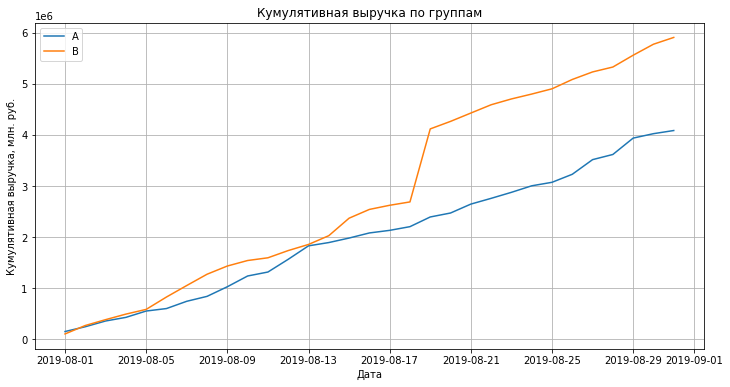

In [18]:
plt.figure(figsize=(12, 6))
plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue'], label='A')
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue'], label='B')
plt.title('Кумулятивная выручка по группам')
plt.xlabel('Дата')
plt.ylabel('Кумулятивная выручка, млн. руб.')
plt.legend()
plt.grid()
plt.show()

У группы B на протяжении практически всего теста выручка была больше. 18-19 августа выручка группы B выросла сразу в 1.5 раза. Скорей всего в данных есть аномалии.

Построим график кумулятивного среднего чека по группам.

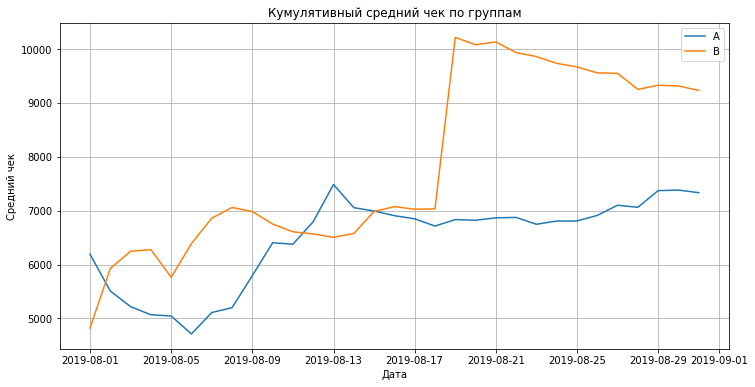

In [19]:
plt.figure(figsize=(12, 6))
plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue'] / cumulativeRevenueA['orders'], label='A')
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue'] / cumulativeRevenueB['orders'], label='B')
plt.title('Кумулятивный средний чек по группам')
plt.xlabel('Дата')
plt.ylabel('Средний чек')
plt.legend()
plt.grid()
plt.show()

У группы B средний чек практически всё время был выше. 18-19 августа средний чек группы B вырос сразу в 1.5 раза, а после этого снижался. 

Построим график относительного изменения кумулятивного среднего чека группы B к группе A

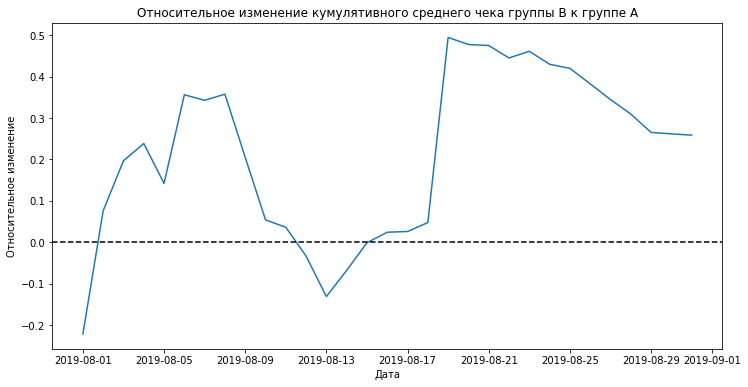

In [20]:
plt.figure(figsize=(12, 6))
mergedCumulativeRevenue = cumulativeRevenueA.merge(cumulativeRevenueB, on='date', suffixes=['A', 'B'])
plt.plot(mergedCumulativeRevenue['date'], (mergedCumulativeRevenue['revenueB'] / mergedCumulativeRevenue['ordersB'])
         / (mergedCumulativeRevenue['revenueA'] / mergedCumulativeRevenue['ordersA']) - 1)
plt.axhline(y=0, color='black', linestyle='--')
plt.title('Относительное изменение кумулятивного среднего чека группы B к группе A')
plt.xlabel('Дата')
plt.ylabel('Относительное изменение')
plt.show()

Результаты теста значительно и резко менялись 9-13 августа и 18-19 августа. Видимо, именно тогда были совершены аномальные заказы.

Построим график кумулятивного среднего количества заказов на посетителя по группам.

Добавим в датафрейм с кумулятивными данными новый столбец с кумулятивным количеством посетителей и сохраним в новый датафрейм.

In [21]:
visitorsAggregated = datesGroups.apply(
    lambda x: visitors[np.logical_and(visitors['date'] <= x['date'], visitors['group'] == x['group'])]
    .agg({'date': 'max', 'group': 'max', 'visitors': 'sum'}), axis=1)

cumulativeData = ordersAggregated.merge(visitorsAggregated, on=['date', 'group'])
cumulativeData.head()

,date,group,orders,buyers,revenue,visitors
0,2019-08-01,A,24,20,148579,719
1,2019-08-01,B,21,20,101217,713
2,2019-08-02,A,44,38,242401,1338
3,2019-08-02,B,45,43,266748,1294
4,2019-08-03,A,68,62,354874,1845


Посчитаем конверсию посетителей в заказы и построим график.

In [22]:
cumulativeData['conversion'] = cumulativeData['orders'] / cumulativeData['visitors']
cumulativeData.head()

,date,group,orders,buyers,revenue,visitors,conversion
0,2019-08-01,A,24,20,148579,719,0.033380
1,2019-08-01,B,21,20,101217,713,0.029453
2,2019-08-02,A,44,38,242401,1338,0.032885
3,2019-08-02,B,45,43,266748,1294,0.034776
4,2019-08-03,A,68,62,354874,1845,0.036856


In [23]:
cumulativeDataA = cumulativeData[cumulativeData['group'] == 'A']
cumulativeDataB = cumulativeData[cumulativeData['group'] == 'B']

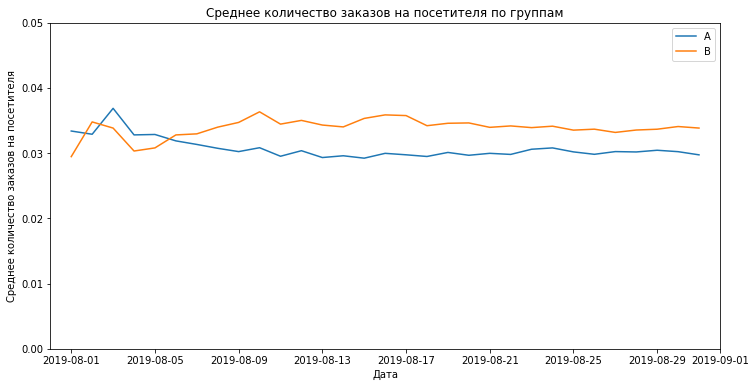

In [24]:
plt.figure(figsize=(12, 6))
plt.plot(cumulativeDataA['date'], cumulativeDataA['conversion'], label='A')
plt.plot(cumulativeDataB['date'], cumulativeDataB['conversion'], label='B')
plt.title('Среднее количество заказов на посетителя по группам')
plt.xlabel('Дата')
plt.ylabel('Среднее количество заказов на посетителя')
plt.axis([dt.datetime(2019, 7, 31), dt.datetime(2019, 9, 1), 0, 0.05])
plt.legend()
plt.show()

В начале теста среднее количество заказов на посетителя группы A было немного выше, чем у группы B, но группа B выровнялась и зафиксировалась примерно около одного значения, большего группы A, а среднее количество заказов на посетителя группы A немного упало с начала теста.

Построим график относительного изменения кумулятивного среднего количества заказов на посетителя группы B к группе A.

Объединим датафреймы с конверсиями по датам и построим график.

In [25]:
mergedCumulativeConversions = (cumulativeDataA.merge(cumulativeDataB, on='date', suffixes=['A', 'B'])
    [['date', 'conversionA', 'conversionB']])
mergedCumulativeConversions.head()

,date,conversionA,conversionB
0,2019-08-01,0.033380,0.029453
1,2019-08-02,0.032885,0.034776
2,2019-08-03,0.036856,0.033833
3,2019-08-04,0.032787,0.030315
4,2019-08-05,0.032851,0.030793


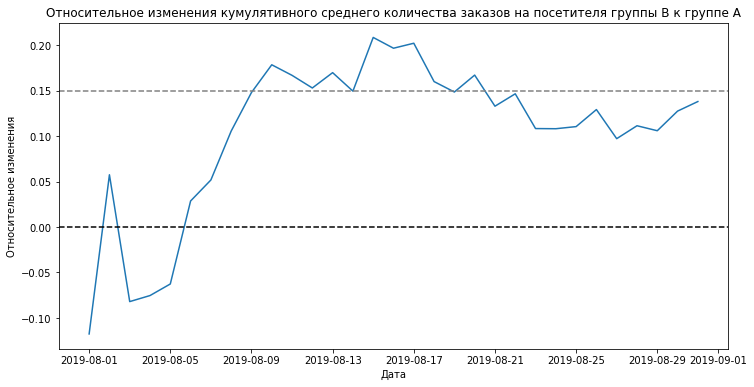

In [26]:
plt.figure(figsize=(12, 6))
plt.plot(mergedCumulativeConversions['date'], mergedCumulativeConversions['conversionB'] 
         / mergedCumulativeConversions['conversionA'] - 1)
plt.title('Относительное изменения кумулятивного среднего количества заказов на посетителя группы B к группе A')
plt.xlabel('Дата')
plt.ylabel('Относительное изменения')
plt.axhline(y=0, color='black', linestyle='--')
plt.axhline(y=0.15, color='grey', linestyle='--')
plt.show()

Почти с самого начала теста группа B лидирует по метрике. Относительное изменение стабильно держится на уровне 10-20% прироста относительно группы A.

Построим точечный график количества заказов по пользователям.

Посчитаем количество заказов каждого покупателя и построим график.

In [27]:
ordersByUsers = (orders.groupby('visitorId', as_index=False)
                 .agg({'transactionId': 'nunique'}))
ordersByUsers.columns = ['visitorId', 'orders']
ordersByUsers.sort_values('orders', ascending=False).head()

,visitorId,orders
1023,4256040402,11
591,2458001652,11
569,2378935119,9
487,2038680547,8
44,199603092,5


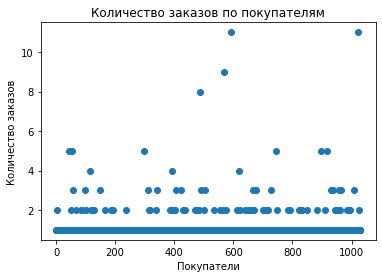

In [28]:
x_values = pd.Series(range(0, len(ordersByUsers)))

plt.scatter(x_values, ordersByUsers['orders'])
plt.title('Количество заказов по покупателям')
plt.xlabel('Покупатели')
plt.ylabel('Количество заказов')
plt.show()

Очень много пользователей, заказавших 1 раз. Пользователей, заказавших больше 2 раз совсем мало.

Посчитаем 95-й и 99-й перцентили количества заказов на пользователя и выберем границу для определения аномальных пользователей.

In [29]:
print(np.percentile(ordersByUsers['orders'], [95, 99]))

[2. 4.]


Не более 5% пользователей совершали больше двух заказов и не более 1% - больше четырех заказов. Будем считать пользователей совершивших 3 и более заказов аномальными.

Построим точечный график стоимостей заказов.

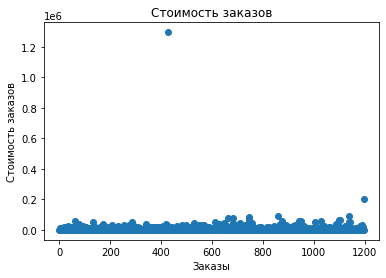

In [30]:
x_values = pd.Series(range(0, len(orders['revenue'])))
plt.scatter(x_values, orders['revenue'])
plt.title('Стоимость заказов')
plt.xlabel('Заказы')
plt.ylabel('Стоимость заказов')
plt.show()

Большинство заказов стоят дешевле 100 000 рублей. Есть выбросы в районе 1 300 000 рублей и 200 000 рублей.

Найдем 95-й и 99-й перцентили стоимости заказов.

In [31]:
print(np.percentile(orders['revenue'], [95, 99]))

[28000.  58233.2]


Заказов дороже 28 000 рублей не более 5%, заказов дороже 58 233.2 не более 1%. Будем считать за аномальную стоимость заказа 50 000 рублей и более.

Посчитаем статистическую значимость различий в среднем количестве заказов на посетителя между группами по «сырым» данным.

Создадим датафреймы с количеством уникальных заказов всех посетителей.

Нулевая гипотеза - равенство среднего количества заказов в обеих группах по сырым данным, альтернативная - неравенство.

In [32]:
ordersByUsersA = orders[orders['group'] == 'A'].groupby('visitorId', as_index=False).agg({'transactionId': pd.Series.nunique})
ordersByUsersB = orders[orders['group'] == 'B'].groupby('visitorId', as_index=False).agg({'transactionId': pd.Series.nunique})
ordersByUsersA.columns = ['visitorId', 'orders']
ordersByUsersB.columns = ['visitorId', 'orders'] 
sampleA = pd.concat([ordersByUsersA['orders'],pd.Series(0, index=np.arange(visitors[visitors['group'] == 'A']['visitors'].sum()
                                                        - len(ordersByUsersA['orders'])), name='orders')],axis=0)
sampleB = pd.concat([ordersByUsersB['orders'],pd.Series(0, index=np.arange(visitors[visitors['group'] == 'B']['visitors'].sum()
                                                        - len(ordersByUsersB['orders'])), name='orders')],axis=0)

In [33]:
print("{0:.5f}".format(st.mannwhitneyu(sampleA, sampleB)[1]))

0.01679


In [34]:
print('Относительный прирост количества заказов -', round(sampleB.mean()/sampleA.mean()-1, 3)) 

Относительный прирост количества заказов - 0.138


P-value меньше 0.05. Отвергаем нулевую гипотезу о равенсте среднего количества заказов на посетителя между группами.

Посчитаем статистическую значимость различий в среднем чеке заказа между группами по «сырым» данным.

Нулевая гипотеза - равенство среднего чека в обеих группах по сырым данным, альтернативная - неравенство.

In [35]:
print('{0:.5f}'.format(st.mannwhitneyu(orders[orders['group']=='A']['revenue'], orders[orders['group']=='B']['revenue'])[1]))

0.72929


P-value больше 0.05. Статистически значимых отличий в среднем чеке между группами нет, нулевую гипотезу не отвергаем.

Посчитаем статистическую значимость различий в среднем количестве заказов на посетителя между группами по «очищенным» данным.

Найдем пользователей с аномальным количеством заказов и аномальной стоимостью заказа.

In [36]:
visitorsWithManyOrders = pd.concat([ordersByUsersA[ordersByUsersA['orders'] > 2]['visitorId'],
                                    ordersByUsersB[ordersByUsersB['orders'] > 2]['visitorId']])
visitorsWithExpensiveOrders = orders[orders['revenue'] >= 50000]['visitorId']
abnormalUsers = (pd.concat([visitorsWithManyOrders, visitorsWithExpensiveOrders]).drop_duplicates())
abnormalUsers.head()

18      199603092
23      237748145
68      611059232
146    1230306981
189    1614305549
Name: visitorId, dtype: int64

Создадим отфильтрованные датафреймы.

In [37]:
sampleAFiltered = pd.concat([ordersByUsersA[np.logical_not(ordersByUsersA['visitorId'].isin(abnormalUsers))]['orders'],
                             pd.Series(0, index=np.arange(visitors[visitors['group'] == 'A']['visitors'].sum()
                                     - len(ordersByUsersA['orders'])), name='orders')])

sampleBFiltered = pd.concat([ordersByUsersB[np.logical_not(ordersByUsersB['visitorId'].isin(abnormalUsers))]['orders'],
                             pd.Series(0, index=np.arange(visitors[visitors['group'] == 'B']['visitors'].sum()
                                     - len(ordersByUsersB['orders'])), name='orders')])
display(sampleAFiltered.head())
sampleBFiltered.head()

0    1
1    1
2    1
3    1
4    1
Name: orders, dtype: int64

0    1
1    1
2    1
3    1
4    1
Name: orders, dtype: int64

Нулевая гипотеза - равенство среднего количества заказов в обеих группах по очищенным данным, альтернативная - неравенство.

In [38]:
print(round(st.mannwhitneyu(sampleAFiltered, sampleBFiltered)[1], 5))

0.00821


In [39]:
print('Относительный прирост количества заказов -', round(sampleBFiltered.mean()/sampleAFiltered.mean()-1, 3)) 

Относительный прирост количества заказов - 0.182


По очищенным данным P-value стал еще меньше. Отвергаем нулевую гипотезу о равенсте среднего количества заказов на посетителя между группами.

Посчитаем статистическую значимость различий в среднем чеке заказа между группами по «очищенным» данным.

Нулевая гипотеза - равенство среднего чека в обеих группах по очищенным данным, альтернативная - неравенство.

In [40]:
print('{0:.5f}'.format(st.mannwhitneyu(orders[np.logical_and(orders['group'] == 'A', 
        np.logical_not(orders['visitorId'].isin(abnormalUsers)))]['revenue'], orders[np.logical_and(orders['group'] == 'B',
        np.logical_not(orders['visitorId'].isin(abnormalUsers)))]['revenue'])[1]))

0.94002


P-value по очищенные данным стал еще больше. Статистически значимых отличий в среднем чеке между группами нет, нулевую гипотезу не отвергаем.

## Выводы

Среднее количество заказов на посетителя в группе B *больше* чем в группе A как по очищенным, так и по сырым данным на 13.8-18.2%.

Средний чек заказа между группами как по сырым данным, так и по очищенным *не отличается*.

Решение по результатам теста: остановить тест, зафиксировать победу группы B.

Хоть средний чек не отличается, но количество заказов на посетителя в группе B больше чем в группе A на 13.8-18.2%. Соответственно раз средний чек не отличается, а заказов больше, то и выручка больше на 13.8-18.2%, что подтверждает график кумулятивной выручки по группам.

Продолжать тест нет смысла так, как данные уже зафиксировались.